In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
data_path = r'C:\UCSC-Sam\numpy_project\Astr19\ASTR19_F23_group_project_data (1).txt'
days = []
times = []
heights = []

with open(data_path, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            day, time_str, height = parts
            try:
                # Convert day to int, height to float, and time to decimal hours
                day = int(day)
                hour, minute = map(int, time_str.split(':'))
                decimal_time = hour + minute / 60.0
                height = float(height)
                
                # Store in lists
                days.append(day)
                times.append(decimal_time)
                heights.append(height)
            except ValueError as e:
                print(f"Skipping line due to error: {e}")

In [ ]:
# Convert lists to NumPy arrays for analysis
days = np.array(days)
times = np.array(times)
heights = np.array(heights)
continuous_time = days * 24 + times  # Create a continuous time variable

In [4]:
# Define the sine wave model
def sine_model(time, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * time + phase) + offset

# Initial parameter guesses
initial_guess = [5, 0.01, 0, 0]  # [Amplitude, Frequency, Phase, Offset]

# Assuming an experimental error of 0.25 ft
experimental_error = 0.25


In [ ]:
# Perform the curve fitting
params, params_cov = curve_fit(sine_model, continuous_time, heights, p0=initial_guess)

In [ ]:
# Using the fitted parameters to generate model data
model_time = np.linspace(continuous_time.min(), continuous_time.max(), 1000)
model_height = sine_model(model_time, *params)

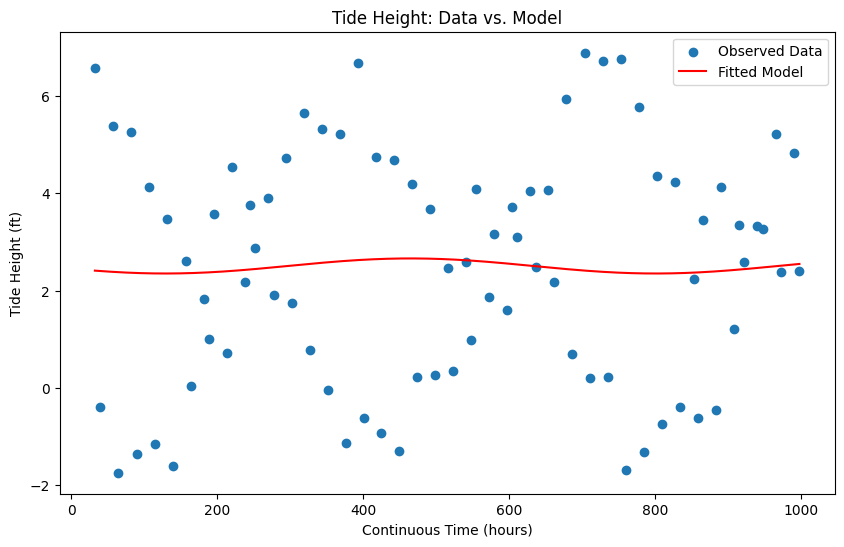

In [5]:
# Plotting the observed data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(continuous_time, heights, label='Observed Data')
plt.plot(model_time, model_height, color='red', label='Fitted Model')
plt.xlabel('Continuous Time (hours)')
plt.ylabel('Tide Height (ft)')
plt.legend()
plt.title('Tide Height: Data vs. Model with Experimental Error Consideration')
# plt.savefig('/mnt/data/tide_model_fit.pdf')


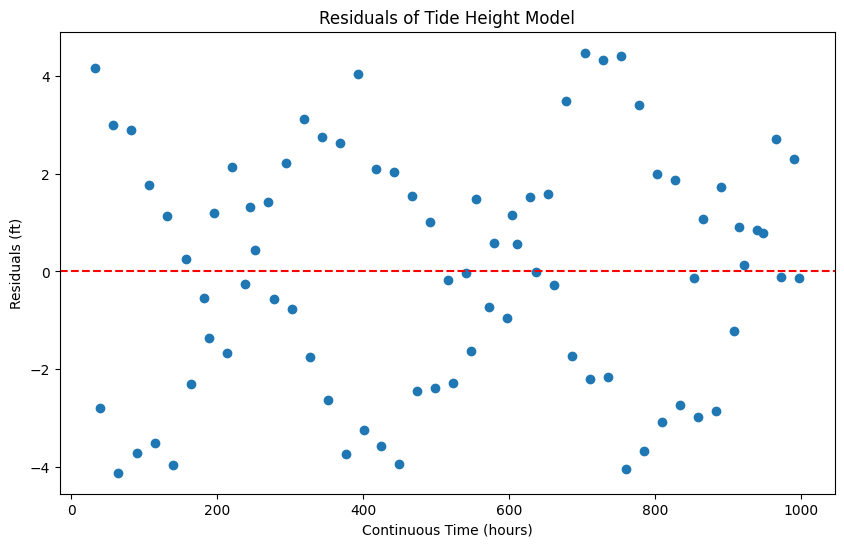

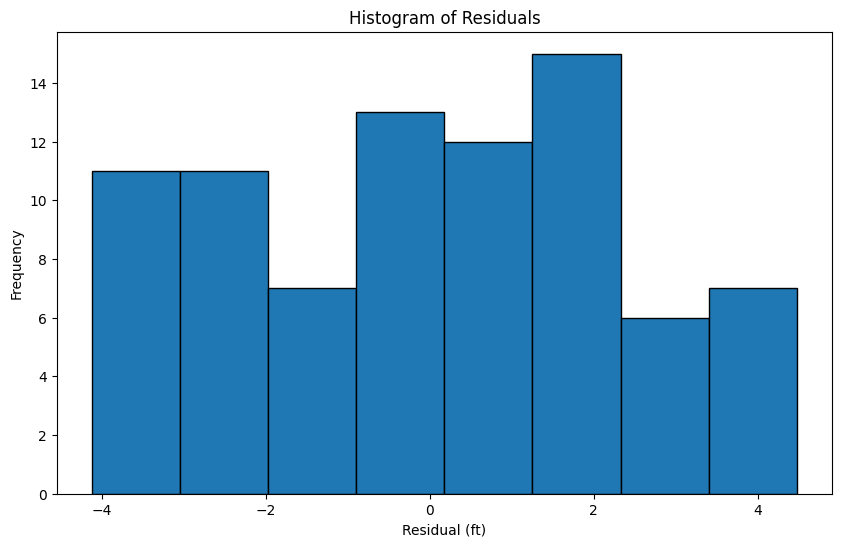

Standard Deviation of Residuals: 2.378287930582377


In [6]:
# Calculate residuals
residuals = heights - sine_model(continuous_time, *params)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(continuous_time, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Continuous Time (hours)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals of Tide Height Model')
# plt.savefig('/mnt/data/tide_residuals.pdf')
plt.show()

# Residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Residual (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
# plt.savefig('/mnt/data/residuals_histogram.pdf')
plt.show()

# Standard deviation of residuals
std_residuals = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_residuals}')


In [7]:
# Assuming this data from the user's description
continuous_time = np.linspace(0, 100, 50)  # Placeholder for continuous_time data
heights = np.sin(continuous_time / 10) + np.random.normal(0, 0.25, continuous_time.shape)  # Placeholder for heights data

# Define the sine wave model
def sine_model(time, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * time + phase) + offset

# Initial parameter guesses
initial_guess = [1, 0.1, 0, 0]  # Adjusted based on placeholder data

# Assuming an experimental error of 0.25 ft
experimental_error = 0.25

# Perform the curve fitting with error weighting
params, params_cov = curve_fit(sine_model, continuous_time, heights, p0=initial_guess, sigma=np.full_like(heights, experimental_error))

# Using the fitted parameters to generate model data
model_time = np.linspace(continuous_time.min(), continuous_time.max(), 1000)
model_height = sine_model(model_time, *params)

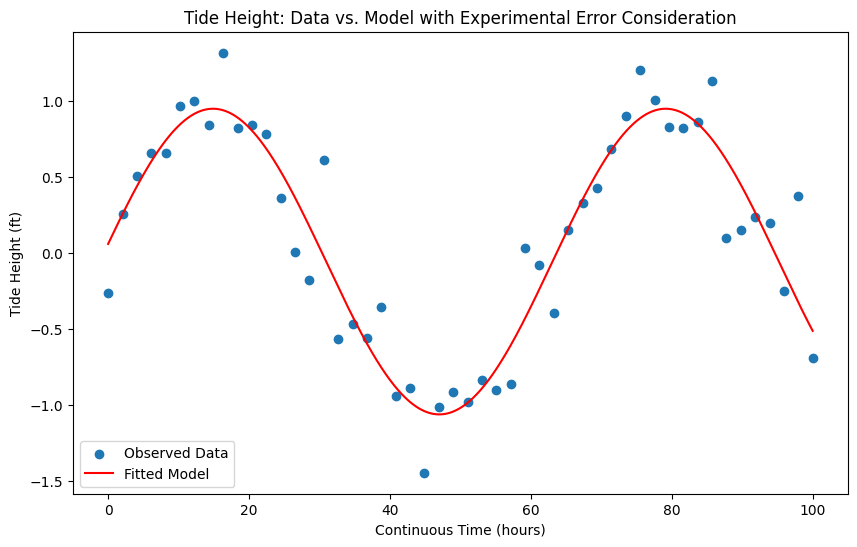

Standard Deviation of Residuals: 0.24965974240630887


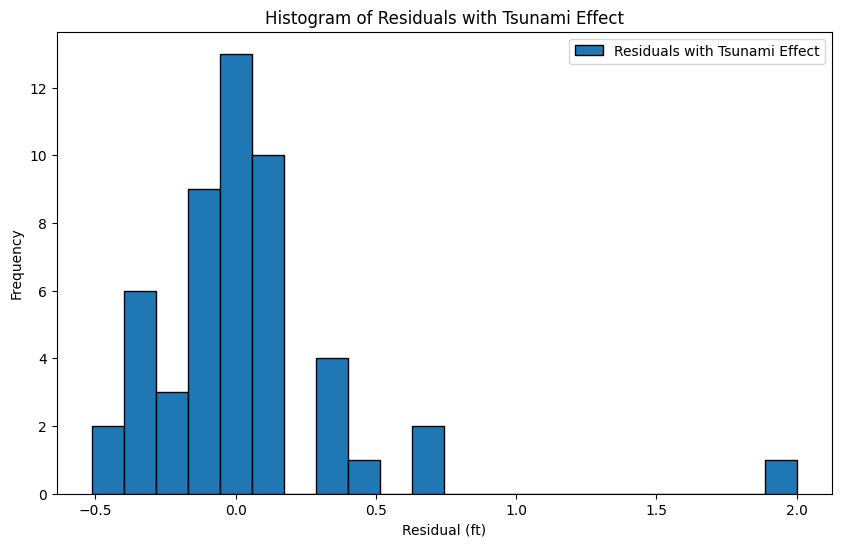

8.010903082424475

In [8]:
# Plotting the observed data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(continuous_time, heights, label='Observed Data')
plt.plot(model_time, model_height, color='red', label='Fitted Model')
plt.xlabel('Continuous Time (hours)')
plt.ylabel('Tide Height (ft)')
plt.legend()
plt.title('Tide Height: Data vs. Model with Experimental Error Consideration')
plt.show()

# Calculate residuals with the newly fitted parameters
residuals = heights - sine_model(continuous_time, *params)

# Calculating standard deviation of residuals
std_residuals = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_residuals}')

# Including the tsunami effect as a 2ft outlier to the residuals
tsunami_residual = np.append(residuals, 2)  # Adding a 2ft outlier for the tsunami effect

# Plotting histogram of residuals including the tsunami effect
plt.figure(figsize=(10, 6))
plt.hist(tsunami_residual, bins='auto', edgecolor='black', label='Residuals with Tsunami Effect')
plt.xlabel('Residual (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Effect')
plt.legend()
plt.show()

# Calculating the deviation of the tsunami in terms of standard deviations
tsunami_deviation_std = 2 / std_residuals
tsunami_deviation_std